In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

# Limpieza de datos

In [27]:
dataset = pd.read_csv("auto-mpg.csv",delim_whitespace=True, header = None)
dataset.head(10)

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [28]:
dataset.iloc[:1,:]

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [35]:
dataset.columns = ["mpg","cylinders","displacemene","horsepower","weight","acceleration","model_year","origin","Car name"]

In [36]:
dataset.head()

,mpg,cylinders,displacemene,horsepower,weight,acceleration,model_year,origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [37]:
dataset["horsepower"] = pd.to_numeric(dataset["horsepower"],errors="coerce").fillna(0).astype(int)

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacemene  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(1)
memory usage: 26.6+ KB


In [40]:
dataset.describe(include="O")

,Car name
count,398
unique,305
top,ford pinto
freq,6


### LabelEncoder

In [41]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le_x = LabelEncoder()
X_en = dataset.iloc[:, 8].values
X_en = le_x.fit_transform(X_en)

In [50]:
X= dataset.iloc[:,1:7]
X["Car"] = X_en
Y = dataset.iloc[:,0].values

In [51]:
X.head()

,cylinders,displacemene,horsepower,weight,acceleration,model_year,Car
0,8,307.0,130,3504.0,12.0,70,49
1,8,350.0,165,3693.0,11.5,70,36
2,8,318.0,150,3436.0,11.0,70,231
3,8,304.0,150,3433.0,12.0,70,14
4,8,302.0,140,3449.0,10.5,70,161


In [53]:
X_copy = X.copy()
X_copy["mpg"]= Y

### Factores o arrays de dimension 1 con una etiqueta (Series)

In [60]:
series = pd.Series(["Color","Sabor","Txto"])
series

0    Color
1    Sabor
2     Txto
dtype: object

In [61]:
np.argsort(series)

0    0
1    1
2    2
dtype: int64

## Definimos la importancia de cada variable

# Correlaciones con la variable dependiente u objetivo 

In [54]:
importance = X_copy.drop("mpg", axis = 1).apply(lambda x: x.corr(X_copy.mpg))

In [57]:
importance

cylinders      -0.775396
displacemene   -0.804203
horsepower     -0.754276
weight         -0.831741
acceleration    0.420289
model_year      0.579267
Car             0.273936
dtype: float64

In [58]:
indices = np.argsort(importance)
print(indices)

cylinders       3
displacemene    1
horsepower      0
weight          2
acceleration    6
model_year      4
Car             5
dtype: int64


In [62]:
importance[indices]

weight         -0.831741
displacemene   -0.804203
cylinders      -0.775396
horsepower     -0.754276
Car             0.273936
acceleration    0.420289
model_year      0.579267
dtype: float64

In [64]:
range(len(indices))

range(0, 7)

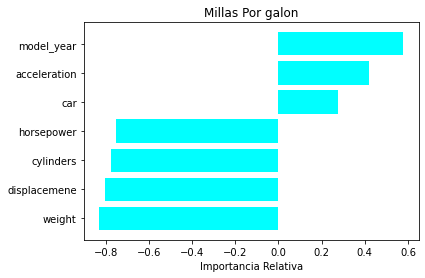

In [81]:
names = ["cylinders","displacemene","horsepower","weight","acceleration","model_year","car"]

plt.title("Millas Por galon")
plt.barh(range(len(indices)), importance[indices], color= "cyan", )
plt.yticks(range(len(indices)),[names[i] for i in indices])
plt.xlabel("Importancia Relativa");

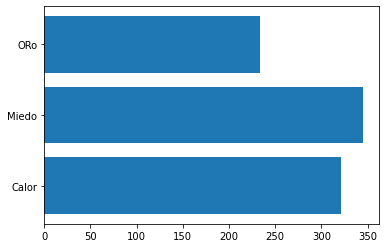

In [83]:
plt.barh(range(0,3), [321,345,234])
plt.yticks(range(0,3), ["Calor","Miedo","ORo"]);

In [95]:
for i in range(0, len(indices)):
    if np.abs(importance[i]) > 0.4:
        print(names[i])

cylinders
displacemene
horsepower
weight
acceleration
model_year


# Correlaciones entre variables "Independientes"

### Matriz de correlacion

In [103]:
X = X_copy.drop(["Car","mpg"], axis = 1)

In [104]:
X

,cylinders,displacemene,horsepower,weight,acceleration,model_year
0,8,307.0,130,3504.0,12.0,70
1,8,350.0,165,3693.0,11.5,70
2,8,318.0,150,3436.0,11.0,70
3,8,304.0,150,3433.0,12.0,70
4,8,302.0,140,3449.0,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86,2790.0,15.6,82
394,4,97.0,52,2130.0,24.6,82
395,4,135.0,84,2295.0,11.6,82
396,4,120.0,79,2625.0,18.6,82


In [105]:
c = X.corr()
c

,cylinders,displacemene,horsepower,weight,acceleration,model_year
cylinders,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746
displacemene,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164
horsepower,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587
weight,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564
acceleration,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137
model_year,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000


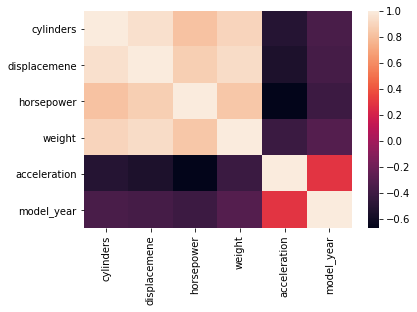

In [106]:
sb.heatmap(c)

In [111]:
X[X.columns[1]]

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
393    140.0
394     97.0
395    135.0
396    120.0
397    119.0
Name: displacemene, Length: 398, dtype: float64

Existe una alta correlacion entre las variables y eso NO SIRVE

In [113]:
for i in range(0, len(X.columns)):
    for j in range(0, len(X.columns)):
        if i != j:
            corr_1 = np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 < 0.3:
                print(X.columns[i], "is not correlated  with ", X.columns[j])
            elif corr_1 >= 0.75:
                print(X.columns[i], "exist highly correlated with", X.columns[j])

cylinders exist highly correlated with displacemene
cylinders exist highly correlated with horsepower
cylinders exist highly correlated with weight
displacemene exist highly correlated with cylinders
displacemene exist highly correlated with horsepower
displacemene exist highly correlated with weight
horsepower exist highly correlated with cylinders
horsepower exist highly correlated with displacemene
horsepower exist highly correlated with weight
weight exist highly correlated with cylinders
weight exist highly correlated with displacemene
weight exist highly correlated with horsepower
acceleration is not correlated  with  model_year
model_year is not correlated  with  acceleration


Como Cylinders tiene menos correlacion con las variables independientes nos quedamos con ella

In [128]:
X = X.drop(["Car","mpg"], axis = 1)

In [129]:
X

,cylinders,acceleration,model_year
0,8,12.0,70
1,8,11.5,70
2,8,11.0,70
3,8,12.0,70
4,8,10.5,70
...,...,...,...
393,4,15.6,82
394,4,24.6,82
395,4,11.6,82
396,4,18.6,82


# Encontrar la ganancia de informacion con la variable dependiente 

Intuitivamente, la información mutua media mide la información que X e Y comparten: mide en cuánto el conocimiento de una variable reduce nuestra incertidumbre sobre la otra. Por ejemplo, si X e Y son independientes, entonces conocer X no da información sobre Y y viceversa, por lo que su información mutua es cero. En el otro extremo, si X e Y son idénticas entonces toda información proporcionada por X es compartida por Y: saber X determina el valor de Y y viceversa

In [130]:
mi = mutual_info_regression(X, Y)

In [131]:
mi

array([0.58715767, 0.20733149, 0.3546572 ])

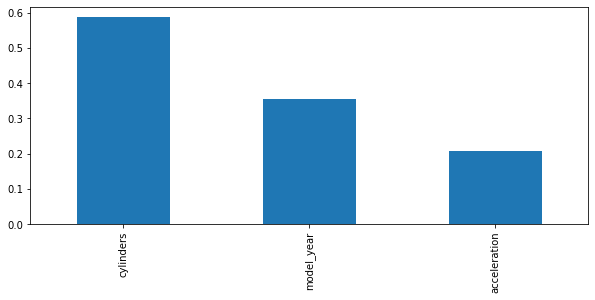

In [133]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))